CLASSIFICAZIONE BINARIA

In [1]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/creditcard.csv

--2022-04-19 18:59:47--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/creditcard.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.150.138
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.150.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 150828752 (144M) [text/csv]
Saving to: ‘creditcard.csv’

creditcard.csv      100%[===================>] 143.84M  31.4MB/s    in 5.2s    

2022-04-19 18:59:53 (27.8 MB/s) - ‘creditcard.csv’ saved [150828752/150828752]



In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve
from sklearn.metrics import f1_score,auc, classification_report

import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
import missingno as msno
msno.matrix(df)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


#EDA

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

NON BILANCIATO

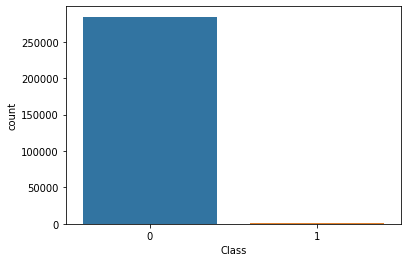

In [ ]:
sns.countplot(df['Class']);

In [ ]:
#plt.figure(figsize=(18,10))
#sns.heatmap(df.corr(),fmt = '.1f',annot=True)

In [ ]:
#sns.pairplot(df,hue='Class');

In [ ]:
df['Time'].value_counts()

163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
127750.0     1
62260.0      1
62259.0      1
127753.0     1
172792.0     1
Name: Time, Length: 124592, dtype: int64

#FEATURES E TARGET

In [5]:
# separating features and target
X = df.drop(columns='Class', axis=1)
y = df['Class']

#STANDARDIZZAZIONE

In [6]:
sc = StandardScaler()
standardized_data = sc.fit_transform(X)
X_ = standardized_data
X_

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

#Train & Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_,y,
                                                    test_size = 0.2,
                                                    random_state=667
                                                    )

In [8]:
print(X.shape, X_train.shape, X_test.shape)

(284807, 30) (227845, 30) (56962, 30)


#BEST MODEL

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [10]:
model_collection = []

model_collection.append(LogisticRegression(solver='liblinear'))
model_collection.append(RandomForestClassifier())
model_collection.append(SVC())
model_collection.append(KNeighborsClassifier())
model_collection.append(DecisionTreeClassifier())
model_collection.append(GaussianNB())

In [13]:
model_list = ['Logistic_Regression','Random_Forest','SVC','KNN','DecisionTree','Naive_Bayes']
acc_list = []
f1_list = []
cm_list = []

for model in model_collection:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc_list.append(accuracy_score(y_test,y_pred))
    f1_list.append(f1_score(y_test,y_pred,average='macro'))
    cm_list.append(confusion_matrix(y_test,y_pred))

KeyboardInterrupt: ignored

In [ ]:
fig = plt.figure(figsize=(18,10))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2,3,i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True,cmap='Blues_r')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')

In [ ]:
for model in model_collection:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(model)
    print(classification_report(y_test,model.predict(X_test)))

In [ ]:
result_df = pd.DataFrame({
                            'Model':model_list,
                            'Accuracy':acc_list,
                            'F1':f1_list
                          })
result_df.sort_values(by=['F1'],ascending=False)

In [ ]:
from sklearn.metrics import plot_roc_curve

plt.figure(figsize=(18,10))
ax = plt.gca()

for cls in model_collection:
    cls.fit(X_train, y_train)
    plot_roc_curve(cls, X_test, y_test, ax=ax)

#MODEL TRAINING

>1, train: 0.999, test: 0.999
>2, train: 0.999, test: 0.999
>3, train: 0.999, test: 0.999
>4, train: 0.999, test: 0.999
>5, train: 1.000, test: 0.999
>6, train: 1.000, test: 1.000
>7, train: 1.000, test: 1.000
>8, train: 1.000, test: 1.000
>9, train: 1.000, test: 1.000
>10, train: 1.000, test: 1.000
>11, train: 1.000, test: 1.000
>12, train: 1.000, test: 1.000
>13, train: 1.000, test: 1.000
>14, train: 1.000, test: 1.000
>15, train: 1.000, test: 1.000
>16, train: 1.000, test: 1.000
>17, train: 1.000, test: 1.000
>18, train: 1.000, test: 1.000
>19, train: 1.000, test: 1.000
>20, train: 1.000, test: 1.000


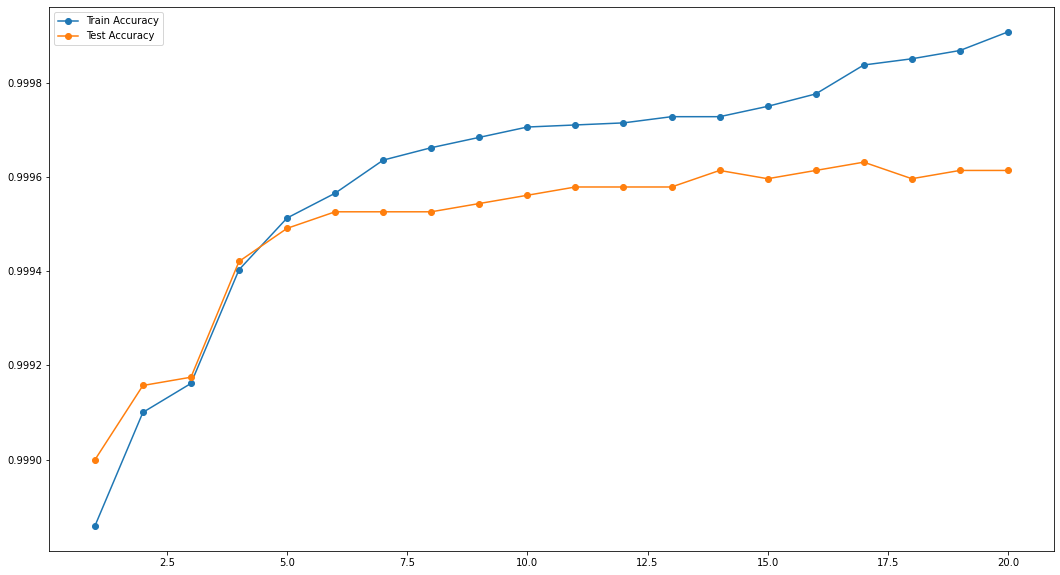

In [ ]:
from sklearn.ensemble import RandomForestClassifier

train_scores, test_scores = [],[]
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_y_pred = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_y_pred)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_y_pred = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_y_pred)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth

plt.figure(figsize=(18,10))
plt.plot(values, train_scores, '-o', label='Train Accuracy')
plt.plot(values, test_scores, '-o', label='Test Accuracy')
plt.legend()

MAX DEPTH 6, train: 1.000, test: 1.000

##Training the Model

In [ ]:
classifier = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=6)

In [ ]:
#training the classifier
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, random_state=667)

##FEATURES IMPORTANCE FOR RANDOM FOREST

Text(0.5, 0, 'Relative Importance')

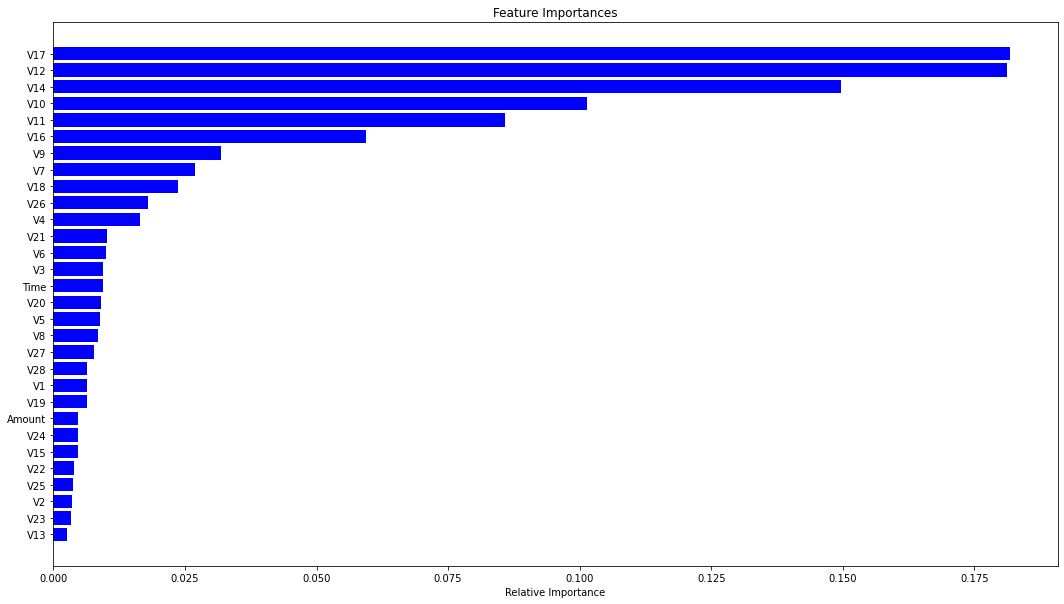

In [ ]:
#Feature importance for Random Forest
features = X.columns
importances = classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(18,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

#MODEL EVALUATION

##ACCURACY SCORE

In [ ]:
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_pred)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9995259997893332


0 --> Classe 0

1 --> Classe 1


In [ ]:
labels = ['Classe 0', 'Classe 1']

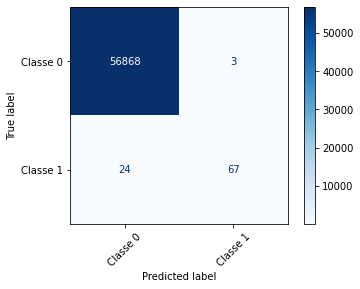

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = ConfusionMatrixDisplay.from_estimator(classifier, 
                                      X_test, 
                                      y_test,
                                      cmap='Blues',
                                      display_labels=labels,
                                      xticks_rotation=45,
                                      )
cm;

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

    Classe 0       1.00      1.00      1.00     56871
    Classe 1       0.96      0.74      0.83        91

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



##ROC Curves

In [ ]:
!pip install plot-metric --quiet

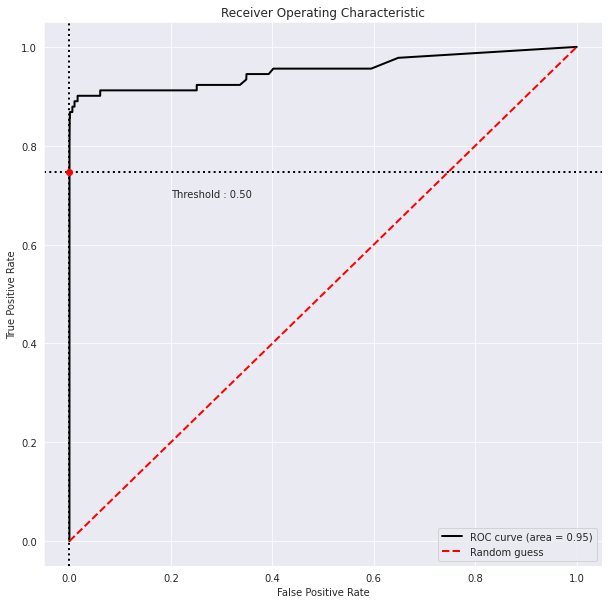

In [ ]:
from plot_metric.functions import BinaryClassification
y_pred_proba = classifier.predict_proba(X_test)[::,1]

#labels = ['class1', 'class2']
bc = BinaryClassification(y_test, y_pred_proba, labels=labels)

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve();

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_pred_proba)

0.9524778557062146

##P-R Curves

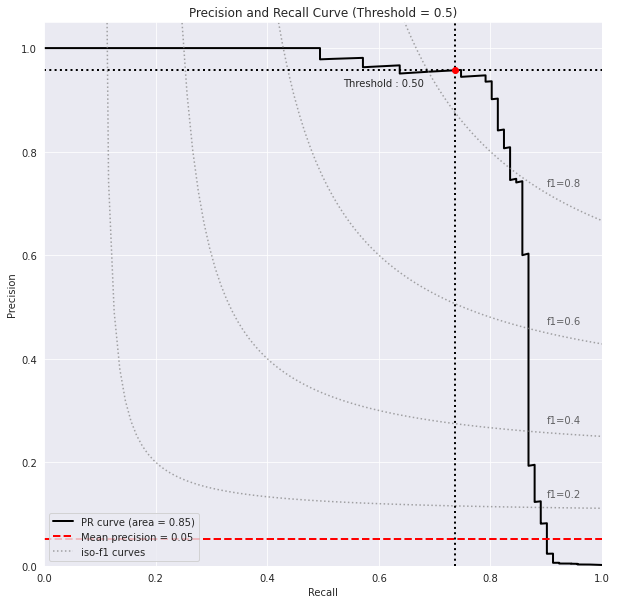

In [ ]:
# Figures
plt.figure(figsize=(10,10))
bc.plot_precision_recall_curve();

#Building a Predictive System

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df['V20'].unique()

array([ 0.2514121 , -0.06908314,  0.52497973, ...,  0.00139597,
        0.12743352,  0.3829481 ])

In [ ]:
input_data = (0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.2514121,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62)

# changing the input data to a numpy array
input_np = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_np.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction[0])

if (prediction[0]==1):
  print('Classe 1')
else:
  print('Classe 0')

0
Classe 0


#Feature selection
Check the Pipeline performance with feature selection

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

featu=[]
for i in range(2,len(X.columns)):
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
    classifier = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=6)
    pipe = Pipeline([
                    ('scaler', StandardScaler()),
                    ('featureselection',rfe),
                    ('classifier',classifier)
                    ])
    pipe.fit(X_train,y_train)
    test_y_pred = pipe.predict(X_test)
    test_acc = accuracy_score(y_test, test_y_pred)
    y_pred_proba = pipe.predict_proba(X_test)[::,1]
    roc_auc = roc_auc_score(y_test,y_pred_proba)
    featu.append(roc_auc)
    # summarize progress
    print('feature selected %d, Acc.Test: %.3f, AUC: %.3f' % (i, test_acc, roc_auc ))

print('\n Best number of feature selection is: %d' % (np.argmax(featu) +2))

feature selected 2, Acc.Test: 0.999, AUC: 0.973
feature selected 3, Acc.Test: 1.000, AUC: 0.981
feature selected 4, Acc.Test: 1.000, AUC: 0.970
feature selected 5, Acc.Test: 1.000, AUC: 0.973
feature selected 6, Acc.Test: 1.000, AUC: 0.976
feature selected 7, Acc.Test: 1.000, AUC: 0.975
feature selected 8, Acc.Test: 1.000, AUC: 0.973
feature selected 9, Acc.Test: 1.000, AUC: 0.979
feature selected 10, Acc.Test: 1.000, AUC: 0.977
feature selected 11, Acc.Test: 1.000, AUC: 0.975
feature selected 12, Acc.Test: 1.000, AUC: 0.969


KeyboardInterrupt: ignored

feature 9

#Pipeline

Always give not normalize data to train the Pipeline!

In [ ]:
# X = features not standardized
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.20,
                                                    random_state=667
                                                    )

In [ ]:
standardize = StandardScaler()
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=94)
classifier = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=6)

pipe = Pipeline([
                ('scaler', StandardScaler()),
                ('featureselection',rfe),
                ('classifier',classifier)
                ])
pipe.fit(X_train,y_train)

In [ ]:
input_data = (0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.2514121,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62)

prediction = pipe.predict([input_data])
print(prediction[0])

if (y_pred[0] == 0):
  print('Class 0')
else:
  print('Class 1')

In [ ]:
import joblib
joblib.dump(pipe,'pipe_creditcard.pkl')

In [ ]:
uploaded_model = joblib.load('pipe_creditcard.pkl')

uploaded_model.predict([input_data])[0] 